# CHAPTER 9 한국어 텍스트 데이터 분류

##  9.1 한국어 텍스트 데이터 분류

### 9.1.2 데이터 셋과 특징 값 추출

- Pandas는 데이터프레임을 사용하기 위한 패키지
- Numpy는 수학적 연산을 하기 위한 패키지

In [1]:
import pandas as pd
import numpy as np

- 미리 준비된 csv파일 사용 (customer_data(filtered).csv)
- CP949는 한글을 위한 문자 인코딩 

In [2]:
df = pd.read_csv('customer_data(filtered).csv', encoding = 'cp949')
df.head()

,Score,Review,SNS,Addr
0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도
1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시
2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시
3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시
4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도


# 1. 특징값 추출

## 1.1 텍스트 데이터 특징값 추출

- 한국어 텍스트 분석을 위한 KoNLPy 설치
- http://konlpy-ko.readthedocs.io/ko/v0.4.4/
- 목차 > 사용하기 > 설치하기 > 윈도우

- Twitter 형태소 분석기 import
- 형태소 분석기 twitter 생성

In [3]:
from konlpy.tag import Twitter
twitter = Twitter()

- Twitter 형태소 분석기로 명사, 형용사를 추출하는 함수 tokenize를 생성
- For 문을 사용해 토큰의 품사가 명사, 형용사일 경우 리스트 변수 stems에 저장 
- 3번 줄의 pos() 함수는 주어진 텍스트를 토큰화하여 품사를 판별하고 태그를 붙여줌

In [4]:
def tokenize(text):
    stems = []
    tagged = twitter.pos(text)
    for i in range (0, len(tagged)): 
        if (tagged[i][1]=='Noun' or tagged[i][1]=='Adjective') :
            stems.append(tagged[i][0])
    return stems

- 고객의 신청글 항목의 0번째 텍스트를 형태소 분석
- 토큰의 품사가 명사인 경우 출력
- For문을 빼고 tagged를 출력하면 모든 토큰의 품사를 확인가능

In [5]:
tagged = twitter.pos(df['Review'][0])
for i in range (0, len(tagged)): 
        if (tagged[i][1]=='Noun') :
            print(tagged[i])

('데', 'Noun')
('일리', 'Noun')
('적', 'Noun')
('부터', 'Noun')
('고기', 'Noun')
('인스턴트', 'Noun')
('음식', 'Noun')
('장', 'Noun')
('상태', 'Noun')
('더욱', 'Noun')
('업무', 'Noun')
('스트레스', 'Noun')
('또한', 'Noun')
('것', 'Noun')
('체험', 'Noun')
('보고', 'Noun')
('장', 'Noun')
('경험', 'Noun')
('보고', 'Noun')


- 텍스트에서 TF-IDF 값을 구하기 위한 패키지 import
- Scikit learn에서 제공하는 TfidfVectorizer 모듈을 사용

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

- 데이터 프레임의 텍스트를 astype 함수를 사용해 문자열 형태로 변환
- tolist 함수를 사용해 리스트로, array 함수를 사용해 배열로 순차적으로 변환

In [7]:
text_data_list = df['Review'].astype(str).tolist()
text_data_arr = np.array([''.join(text) for text in text_data_list])

- TF-IDF 값으로 문서단어행렬을 생성하는 TfidfVectorizer를 사용해 모듈 vectorizer를 생성
- min_df = 2 : 단어의 최소 등장 빈도로 2번 이상 등장하는 단어들을 대상으로 함
- tokenizer = tokenize : 입력되는 문자열을 토큰화하여 사용
- Norm = l2 : pearson 함수를 사용해 normalization 진행 
- 문서단어행렬을 만드는 Fit_transform함수를 사용해 배열에 저장된 데이터의 문서단어행렬을 구하고 matrix 형식의 변수 text_data에 저장

In [8]:
vectorizer = TfidfVectorizer(min_df=2, tokenizer=tokenize, norm='l2')
text_data = vectorizer.fit_transform(text_data_arr)

- TF-IDF 값으로 문서단어 행렬을 데이터 프레임 df_tfidf에 입력해 출력

In [9]:
df_tfidf = pd.DataFrame(text_data.A, columns=vectorizer.get_feature_names())
df_tfidf.head()

,가게,가격,가구,가기,가까이,가끔,가능,가능성,가능하다,가능한,...,희망이,힘,힘드네,힘든,힘들,힘들어,힘들었,힘듭니,힘찬,힝
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### SNS 데이터

- %matplotlib inline : 그래프를 구성하고 별도의 명령어 없이 Jupyter Notebook 내에서 그래프를 바로 확인할 수 있도록 inline사용
- matplotlib : 그래프를 그리기 위한 시각화도구
- Seaborn  : matplotllib을 기반으로 더 세련된 시각화를 위한 라이브러리

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

- 폰트를 관리하는 font_manager, rc 임포트
- 맑은고딕 폰트 (malgun)을 폰트로 설정하기 위해 이름을 가져와 변수 font_name에 입력
- Rc 함수를 사용해 위에서 지정한 폰트를 사용

In [11]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

- SNS분포를 시각화하므로 SNS열을 사용

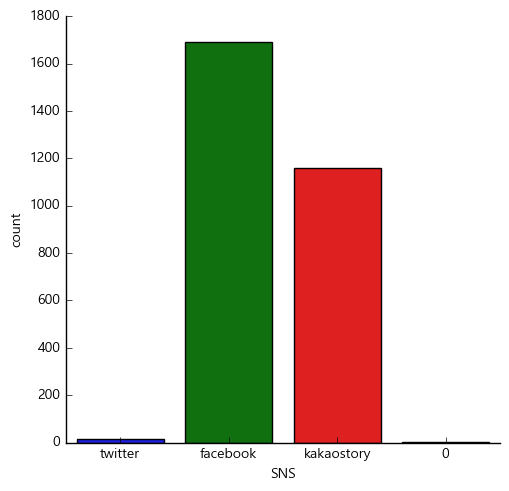

In [12]:
g = sns.factorplot('SNS', data=df, kind='count', size=5)
g.set_xlabels()

##### 주소 데이터

- 주소정보를 시각화하므로 Addr 열을 사용
- Xticklabels(rotation=90) : 주소가 길기 때문에 90도 회전시켜서 세로로 보이게 조정함.

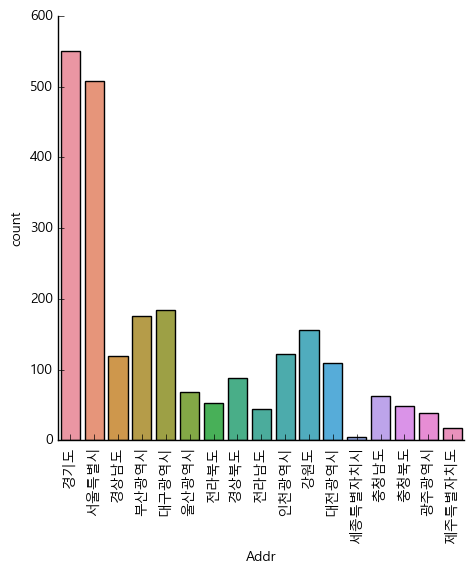

In [13]:
g = sns.factorplot('Addr', data=df, kind='count', size=5)
g.set_xticklabels(rotation=90)
g.set_xlabels()

##### 점수 데이터

- 데이터 프레임의 ‘Score’값을 시각화

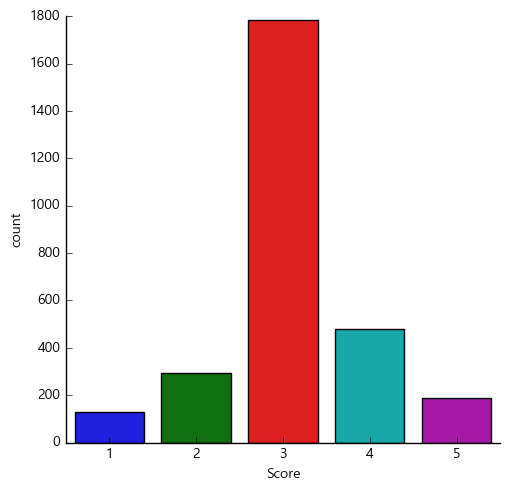

In [14]:
g = sns.factorplot('Score', data=df, kind='count', size=5)
g.set_xlabels()

- 점수가 없을 경우를 dropna 함수를 사용해 제외
- 인덱스를 재부여
- 통합된 점수를 입력할 score2 생성

In [15]:
df = df.dropna(subset=['Score'])
df.index = range(0,len(df))
df['Score2'] = ''

- 1, 2점은 bad, 3점은 normal, 4, 5점은 good으로 통합

In [16]:
for i in range(0,len(df)) :
    if(df['Score'][i] < 3) :
        df['Score2'][i] = 'bad'
    elif (df['Score'][i] > 3) :
        df['Score2'][i] = 'good'
    elif (df['Score'][i] == 3) :
        df['Score2'][i] = 'normal'
df.head()

C:\Users\Yoo\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Yoo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Yoo\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Score,Review,SNS,Addr,Score2
0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


- 새로 부여한 Score2 값을 가지고 시각화

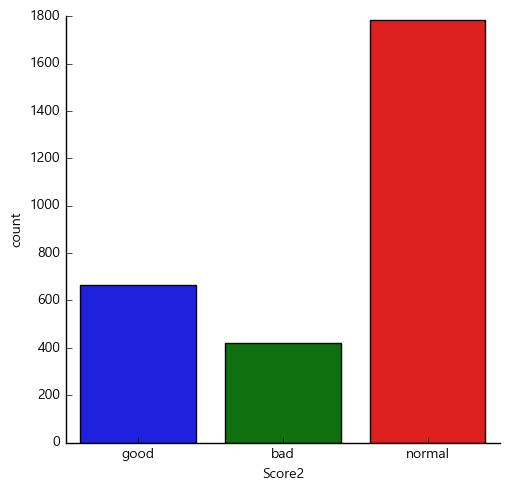

In [17]:
g = sns.factorplot('Score2', data=df, kind='count', size=5)
g.set_xlabels()

- 데이터 셋 저장

In [18]:
df.to_csv('customer_data(filtered)_generated.csv')

### 9.1.3. 분류

#### 데이터 셋 준비
- 고객 텍스트 데이터의 good, normal, bad 여부를 훈련, 분류
- 데이터 셋 준비 - 저장한 데이터 셋을 다시 불러옴 

In [19]:
df = pd.read_csv('customer_data(filtered)_generated.csv', encoding='cp949')
df.head()

,Unnamed: 0,Score,Review,SNS,Addr,Score2
0,0,5,안녕하세요. 데일리 신청해 봅니다. 어렸을 적 부터 장이 좋지 않았는데 고기 인...,twitter,경기도,good
1,1,2,오!! 안그래도 장이 안좋아서 아침마다 고생이거든요~~ 먹고 건강해지고 싶네용 ^^,facebook,서울특별시,bad
2,2,2,요즘 장이 안좋은지 하루종일 더부룩하고 배변후에도 시원하지 않네요.꼭 체험해보고싶습니다.,facebook,서울특별시,bad
3,3,3,우리 아이가 은가를 동글 동글 염소 똥처럼 눈답니다. 매번 너무 걱정이랍니다. 꼭 ...,facebook,서울특별시,normal
4,4,5,이것저것 유산균을 먹어봤지만 이거다~ 하는걸 아직 못만났어요. 장이 예민한 우리 작...,kakaostory,경상남도,good


- 데이터 형식을 str로 바꾼 다음 list로 다시 변경

In [20]:
review_data = df['Review'].astype(str).tolist()
review_label = df['Score2'].astype(str).tolist()

- 데이터 셋의 80%는 training set으로, 나머지 20%는 test set으로 구성
- 기계학습 알고리즘에 적용하기 위해서 np.array() 를 사용해 데이터 형식을 변형
- Review_data는 x_train,  x_test로 분할 (분할 범위 내의 data를 join함수를 사용해 연결)
- Review_label은 y_train,  y_test로 분할

In [21]:
trainset_size = int(round(len(review_data)*0.80))

x_train = np.array([''.join(data) for data in review_data[0:trainset_size]])
y_train = np.array([data for data in review_label[0:trainset_size]])

x_test = np.array([''.join(data) for data in review_data[trainset_size+1:len(review_data)]])
y_test = np.array([data for data in review_label[trainset_size+1:len(review_label)]])

- fit_transform 함수를 사용해서 training set을 기반으로 문서단어행렬 구성
- Transform 함수를 사용해서 test_set을 기반으로 문서단어행렬 구성
- Fit_transform() 은 fit 함수와 transform 함수의 기능이 합쳐진 함수

In [22]:
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

- 컬럼명이 Classifier, F-Measure, Accuracy인 데이터프레임 df_per 생성

In [23]:
df_per = pd.DataFrame(columns=['Classifier', 'F-Measure', 'Accuracy'])
df_per

,Classifier,F-Measure,Accuracy


#### 성능 평가 패키지 import
- confusion matrix : 분류 결과 건수를 나타내는 confusion matrix를 구성하는 모듈
- classification report : recall, precision, f-measure를 제공하는 모듈
- f1_score : f measure 값을 계산
- accuracy score : accuracy 값을 계산

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

##### Naive Bayes
- MultinomialNB 패키지를 import
- fit 함수를 사용하여 모델 학습
- predict 함수를 사용해 예측값 추출 진행 
- Confusion matrix, classification_report, accuracy score 을 사용한 성능 계산 결과 추출
- 실제 값인 y_test와 예측값 nb_pred를 비교해서 각각 출력 
- Accuracy_score에서의 매개변수 normalize = True를 통해 정확도를 계산하여 출력
- False일 경우 올바르게 분류된 데이터 건수를 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림

In [25]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB().fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, nb_pred))
print('\n Classification Report \n')
print(classification_report(y_test, nb_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, nb_pred, normalize=True),2))


 Confusion Matrix 

[[  0   0  60]
 [  0   9  92]
 [  0   2 410]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.00      0.00      0.00        60
       good       0.82      0.09      0.16       101
     normal       0.73      1.00      0.84       412

avg / total       0.67      0.73      0.63       573


 Accuracy 

0.73


C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### 성능 저장
- f1_score 함수를 사용해 실제값과 분류 결과값을 비교해 f-measure 계산
- average=‘weighted’를 사용해 각 클래스마다 가중치 적용
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- accuracy_score 함수를 사용해 실제값과 분류 결과값을 비교해 accuracy 계산
- normalize=True를 통해 정확도 출력, False일 경우 올바르게 분류된 데이터 건수 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림
- loc 함수를 사용해 데이터 프레임에 인덱스를 지정해 입력

In [26]:
fm = round(f1_score(y_test, nb_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, nb_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Naive Bayes', fm, ac]
df_per

C:\Users\Yoo\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73


##### Decision Tree
- DecisionTreeClassifier 패키지를 import
- DecisionTreeClassifier 모듈을 사용해 decision tree 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 dt_classifier 훈련
- predict 함수를 사용해 예측값 추출 진행 
- Confusion matrix, classification_report, accuracy score 을 사용한 성능 계산 결과 추출
- 실제 값인 y_test와 예측값 dt_pred를 비교해서 각각 출력 
- Accuracy_score에서의 매개변수 normalize = True를 통해 정확도를 계산하여 출력
- False일 경우 올바르게 분류된 데이터 건수를 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier().fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, dt_pred))
print('\n Classification Report \n')
print(classification_report(y_test, dt_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, dt_pred, normalize=True),2))


 Confusion Matrix 

[[ 47   2  11]
 [  1  67  33]
 [ 37  53 322]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.55      0.78      0.65        60
       good       0.55      0.66      0.60       101
     normal       0.88      0.78      0.83       412

avg / total       0.79      0.76      0.77       573


 Accuracy 

0.76


#### 성능 저장

In [28]:
fm = round(f1_score(y_test, dt_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, dt_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Decison Tree', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.77,0.76


##### Random Forest
- RandomForestClassifier 패키지를 import
- RandomForestClassifier 모듈을 사용해 random forest 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 rf_classifier 훈련
- predict 함수를 사용해 예측값 추출 진행 
- Confusion matrix, classification_report, accuracy score 을 사용한 성능 계산 결과 추출
- 실제 값인 y_test와 예측값 dt_pred를 비교해서 각각 출력 
- Accuracy_score에서의 매개변수 normalize = True를 통해 정확도를 계산하여 출력
- False일 경우 올바르게 분류된 데이터 건수를 출력round 함수를 사용해 소수점 2번째 자리까지 반올림

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, rf_pred))
print('\n Classification Report \n')
print(classification_report(y_test, rf_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, rf_pred, normalize=True),2))


 Confusion Matrix 

[[ 49   0  11]
 [  0  55  46]
 [ 19   0 393]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.72      0.82      0.77        60
       good       1.00      0.54      0.71       101
     normal       0.87      0.95      0.91       412

avg / total       0.88      0.87      0.86       573


 Accuracy 

0.87


#### 성능 저장

In [30]:
fm = round(f1_score(y_test, rf_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, rf_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Random Forest', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.77,0.76
2,Random Forest,0.86,0.87


##### SVM
- LinearSVC 패키지를 import
- LinearSVC 모듈을 사용해 svm 알고리즘으로 모델을 생성
- Fit 함수를 사용해 모델 svm_classifier 훈련
- predict 함수를 사용해 예측값 추출 진행 
- Confusion matrix, classification_report, accuracy score 을 사용한 성능 계산 결과 추출
- 실제 값인 y_test와 예측값 dt_pred를 비교해서 각각 출력 
- Accuracy_score에서의 매개변수 normalize = True를 통해 정확도를 계산하여 출력
- False일 경우 올바르게 분류된 데이터 건수를 출력
- round 함수를 사용해 소수점 2번째 자리까지 반올림

In [31]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC().fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)

print('\n Confusion Matrix \n')
print(confusion_matrix(y_test, svm_pred))
print('\n Classification Report \n')
print(classification_report(y_test, svm_pred))
print('\n Accuracy \n')
print(round(accuracy_score(y_test, svm_pred, normalize=True),2))


 Confusion Matrix 

[[ 38   2  20]
 [  0  57  44]
 [ 37  54 321]]

 Classification Report 

             precision    recall  f1-score   support

        bad       0.51      0.63      0.56        60
       good       0.50      0.56      0.53       101
     normal       0.83      0.78      0.81       412

avg / total       0.74      0.73      0.73       573


 Accuracy 

0.73


#### 성능 저장

In [32]:
fm = round(f1_score(y_test, svm_pred, average='weighted'), 2)
ac = round(accuracy_score(y_test, svm_pred, normalize=True), 2)
df_per.loc[len(df_per)] = ['Support Vector Machine', fm, ac]
df_per

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.63,0.73
1,Decison Tree,0.77,0.76
2,Random Forest,0.86,0.87
3,Support Vector Machine,0.73,0.73


##### 성능 비교
- 시각화를 위해 분류기 명을 set_index 함수를 사용해 index로 설정

In [33]:
df_per_1 = df_per.set_index('Classifier')
df_per_1

,F-Measure,Accuracy
Classifier,,
Naive Bayes,0.63,0.73
Decison Tree,0.77,0.76
Random Forest,0.86,0.87
Support Vector Machine,0.73,0.73


- F-measure과 Accuracy 값을 plot 함수를 사용해 시각화
- kind=‘bar’ : 막대 그래프
- title=‘preformance’ : 그래프 제목
- figsize : 그래프 크기 지정
- legend : 데이터 설명
- fontsize : 글씨 크기 
- 그래프의 x축을 분류기 명으로 지정
- 그래프 그리기

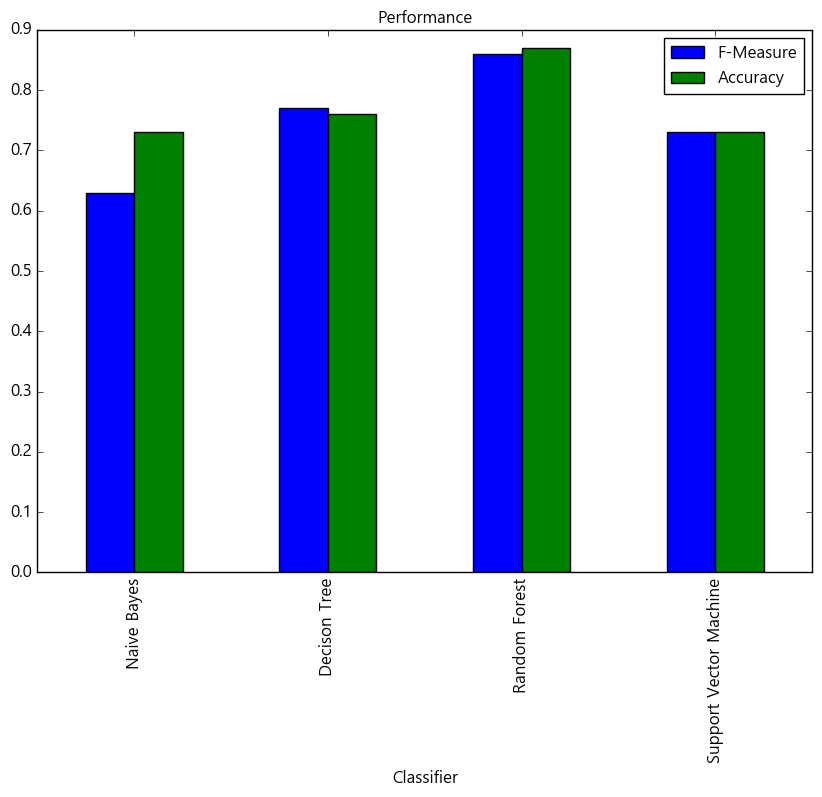

In [34]:
ax = df_per_1[['F-Measure','Accuracy']].plot(kind='bar', title ='Performance'
                                             , figsize=(10, 7), legend=True, fontsize=12)
ax.set_xlabel('Classifier', fontsize=12)
plt.show()